# 11과 이변량분석 종합실습

## 환경준비

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

# 1.숫자형 Y : car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|
|	Education 	|	 지역 주민 평균 교육수준(범주: 11~17)	|	feature	|



In [2]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop(['Income', 'Urban', 'Education'],axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,138,11,276,120,Bad,42,Yes
1,11.22,111,16,260,83,Good,65,Yes
2,10.06,113,10,269,80,Medium,59,Yes
3,7.40,117,4,466,97,Medium,55,Yes
4,4.15,141,3,340,128,Bad,38,No


In [3]:
target = 'Sales'

### (1) 숫자형(수치형) X --> Y
* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

#### ① Advertising -> Sales

1) 시각화 : scatter(regplot), jointplot

In [4]:
feature = 'Advertising'

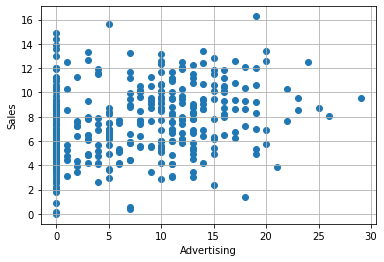

In [5]:
plt.scatter(data[feature], data[target])
plt.xlabel(feature)
plt.ylabel(target)
plt.grid()
plt.show()

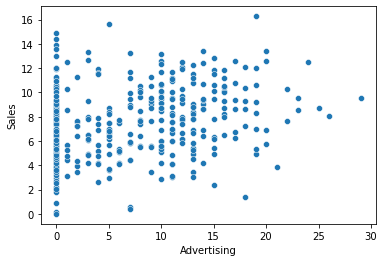

In [6]:
# 해외 지사는 광고를 하지 않았음.
sns.scatterplot(x = feature, y = target, data = data)
plt.show()

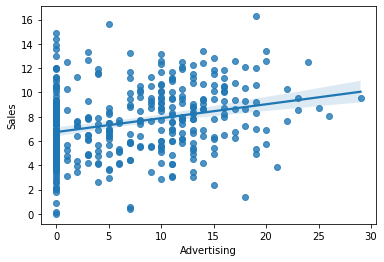

In [7]:
# regression plot) 0인 부분 때문에 기울기가 작아짐.
sns.regplot(x = feature, y = target, data = data)
plt.show()

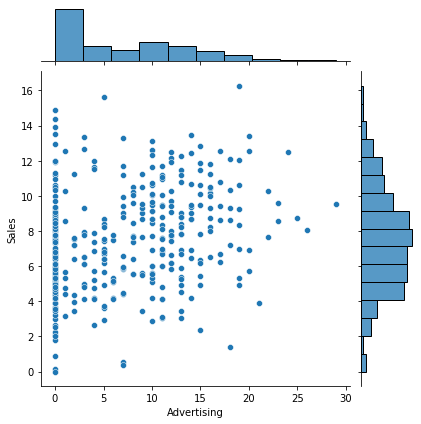

In [8]:
sns.jointplot(x = feature, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [9]:
spst.pearsonr(data[feature], data[target])

(0.269506781376902, 4.377677110302732e-08)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- Advertising과 Sales의 상관관계는 0.2695.
- 상관관계가 있으나 강하지는 않다.

#### ② Population -> Sales

1) 시각화 : scatter(regplot), jointplot

In [10]:
feature = 'Population'

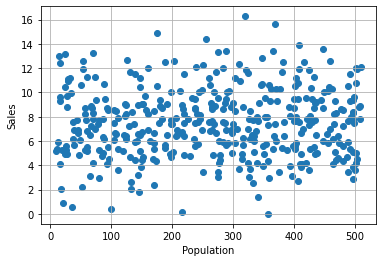

In [11]:
plt.scatter(data[feature], data[target])
plt.xlabel(feature)
plt.ylabel(target)
plt.grid()
plt.show()

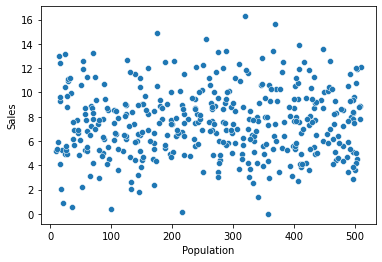

In [12]:
sns.scatterplot(x = feature, y = target, data = data)
plt.show()

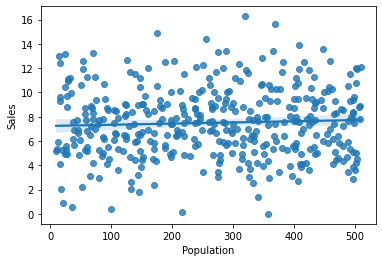

In [13]:
sns.regplot(x = feature, y = target, data = data)
plt.show()

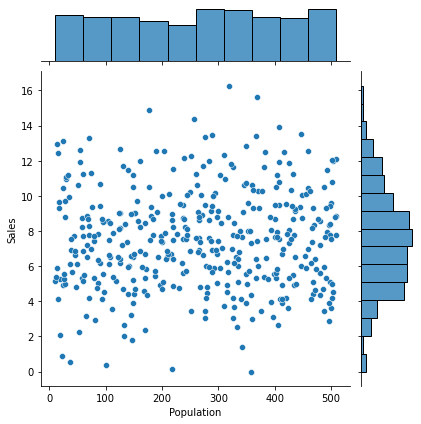

In [14]:
sns.jointplot(x = feature, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [15]:
spst.pearsonr(data[feature], data[target])

(0.0504709844720392, 0.31398160931903)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- Population과 Sales의 상관관계는 0.0504.
- p-value가 0.31이므로 상관관계가 없다.
- 단, 인구수가 많으면 판매량이 늘어나는것 아닐까? 왜 관련이 없지?

#### ③ Price -> Sales

1) 시각화 : scatter(regplot), jointplot

In [16]:
feature = 'Price'

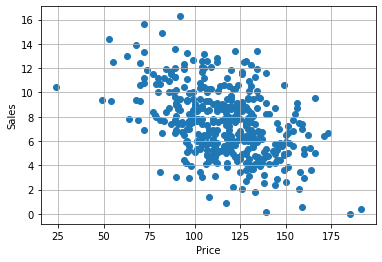

In [17]:
plt.scatter(data[feature], data[target])
plt.xlabel(feature)
plt.ylabel(target)
plt.grid()
plt.show()

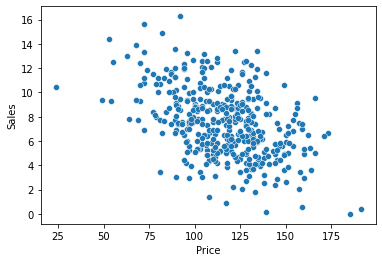

In [18]:
sns.scatterplot(x = feature, y = target, data = data)
plt.show()

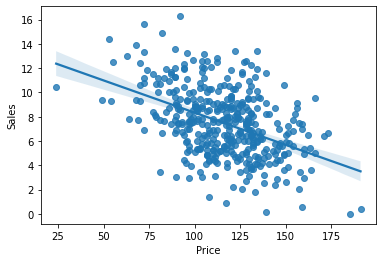

In [19]:
sns.regplot(x = feature, y = target, data = data)
plt.show()

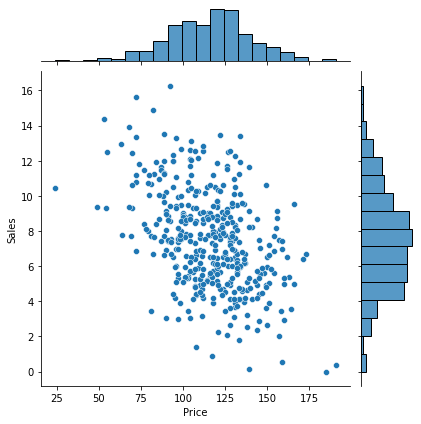

In [20]:
sns.jointplot(x = feature, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [21]:
spst.pearsonr(data[feature], data[target])

(-0.4449507278465726, 7.61818701191294e-21)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- Price와 Sales의 상관관계는 -0.44495
- 음의 상관관계가 있다.

#### ④ Age -> Sales

1) 시각화 : scatter(regplot), jointplot

In [22]:
feature = 'Age'

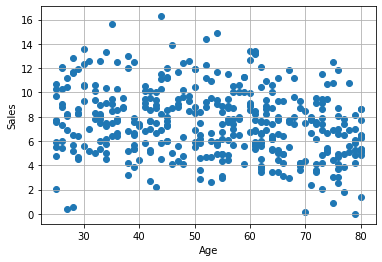

In [23]:
plt.scatter(data[feature], data[target])
plt.xlabel(feature)
plt.ylabel(target)
plt.grid()
plt.show()

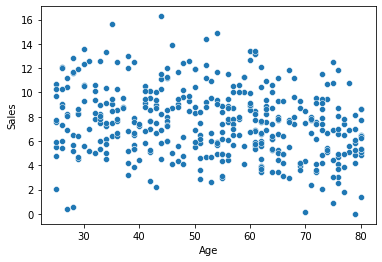

In [24]:
sns.scatterplot(x = feature, y = target, data = data)
plt.show()

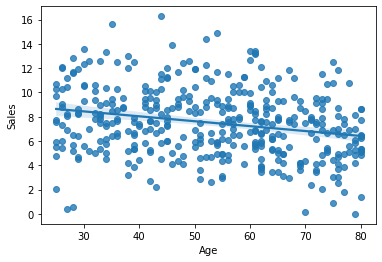

In [25]:
sns.regplot(x = feature, y = target, data = data)
plt.show()

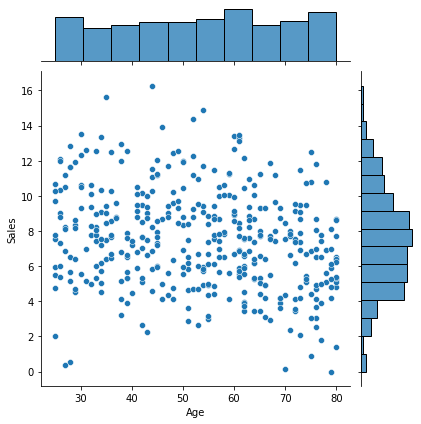

In [26]:
sns.jointplot(x = feature, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [27]:
spst.pearsonr(data[feature], data[target])

(-0.2318154396045765, 2.7889498393711916e-06)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- Age와 Sales의 상관관계는 -0.2318
- 연령대 (평균연령이 높아질 수록 판매량이 낮아진다)
- 관련이 있으나 강하지는 않다.
- 강하지 않은 이유가 무엇일까? 카시트를 필요로 하는 연령대가 있을텐데...

#### ⑤ CompPrice -> Sales

1) 시각화 : scatter(regplot), jointplot

In [28]:
feature = 'CompPrice'

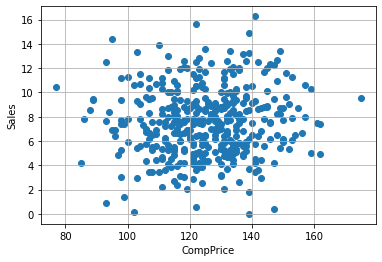

In [29]:
plt.scatter(data[feature], data[target])
plt.xlabel(feature)
plt.ylabel(target)
plt.grid()
plt.show()

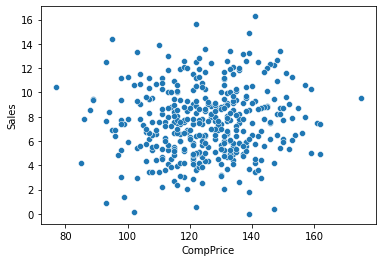

In [30]:
sns.scatterplot(x = feature, y = target, data = data)
plt.show()

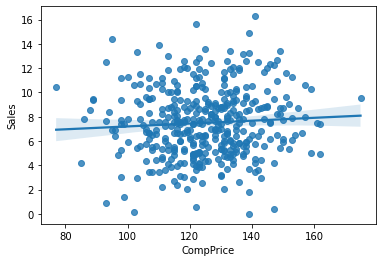

In [31]:
sns.regplot(x = feature, y = target, data = data)
plt.show()

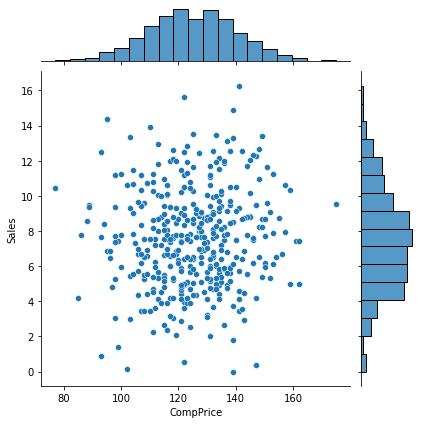

In [32]:
sns.jointplot(x = feature, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [33]:
spst.pearsonr(data[feature], data[target])

(0.06407872955062152, 0.2009398289418295)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- CompPrice와 Sales의 상관관계는 0.0640
- 경쟁사 가격 --> 판매량 관련 없음.
- 왜????
    - 경쟁사 가격이 아닌 가격 경쟁력이라는 변수가 필요하지 않을까?

In [34]:
# 가격경쟁력 변수 추가
data['Price_diff'] = data['CompPrice'] - data['Price']

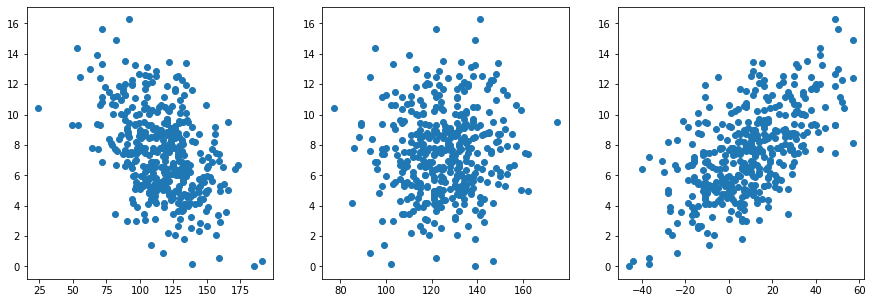

In [35]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.scatter(x = 'Price', y = target, data = data)

plt.subplot(1, 3, 2)
plt.scatter(x = 'CompPrice', y = target, data = data)

plt.subplot(1, 3, 3)
plt.scatter(x = 'Price_diff', y = target, data = data)

plt.show()

In [36]:
spst.pearsonr(data['Price'], data[target])

(-0.4449507278465726, 7.61818701191294e-21)

In [37]:
spst.pearsonr(data['CompPrice'], data[target])

(0.06407872955062152, 0.2009398289418295)

In [38]:
spst.pearsonr(data['Price_diff'], data[target])

(0.5979217124533921, 3.877120641788835e-40)

- 강한 상관관계의 변수가 생김.
- 고객 관점이 중요.

### (2) 범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

#### ① ShelveLoc-> Sales

1) 시각화 : 평균비교 barplot

In [39]:
feature = 'ShelveLoc'

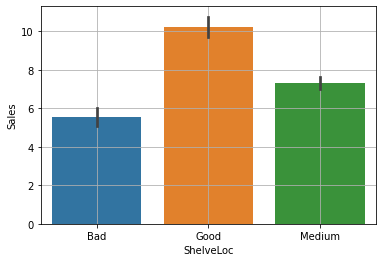

In [40]:
sns.barplot(x = feature, y = target, data = data) # 평균을 비교할 수 있는 barplot
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [41]:
bad = data.loc[data[feature] == 'Bad', target]
good = data.loc[data[feature] == 'Good', target]
medium = data.loc[data[feature] == 'Medium', target]

In [42]:
spst.f_oneway(bad, good, medium)

F_onewayResult(statistic=92.22990509910346, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 전체 평균과 각 범주의 평균과의 차이가 아주 크다.

#### ② US-> Sales

1) 시각화 : 평균비교 barplot

In [43]:
feature = 'US'

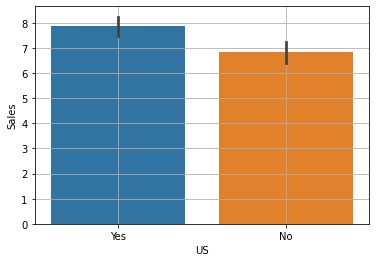

In [44]:
sns.barplot(x = feature, y = target, data = data) # 평균을 비교할 수 있는 barplot
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [45]:
yes = data.loc[data[feature] == 'Yes', target]
no = data.loc[data[feature] == 'No', target]

In [46]:
spst.ttest_ind(yes, no)

Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 전체 평균과 각 범주의 평균과의 차이가 있다.

### (3) 관계 정리하기

① 강한관계

- ShelveLoc, Price_diff

② 중간관계

- US, Price, Age, Advertising

③ 관계없음

- CompPrice, Population

# 2.범주형 Y

## 1.1 타이타닉 탑승객 데이터 : 기본

![](https://images0.persgroep.net/rcs/0XaEsm6zKVcBbpINLInGGmU2F8w/diocontent/22495473/_crop/2/111/1997/1128/_fitwidth/763?appId=93a17a8fd81db0de025c8abd1cca1279&quality=0.8)

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Sibsp	|	# of siblings / spouses aboard the Titanic	|		|
|	Parch	|	# of parents / children aboard the Titanic	|		|
|	Ticket	|	Ticket number	|		|
|	Fare	|	Passenger fare	|		|
|	Cabin	|	Cabin number	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [34]:
titanic = pd.read_csv('https://bit.ly/3FsgwkJ')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
target = 'Survived'

### (1) 숫자형 X --> 범주형 Y

* 그래프 : histogram, densityplot
* 수치화 : 로지스틱회귀  
* 관계 평가

#### ① Age --> Survived

In [60]:
feature = 'Age'

1) 그래프 : histogram, densityplot

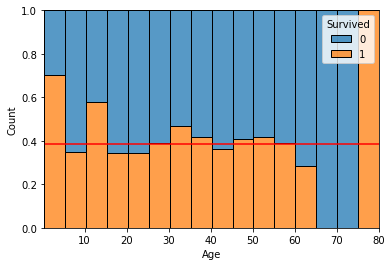

In [61]:
sns.histplot(x = feature, data = titanic, bins = 16
             , hue = target, multiple = 'fill')
plt.axhline(titanic[target].mean(), color = 'r')
plt.show()

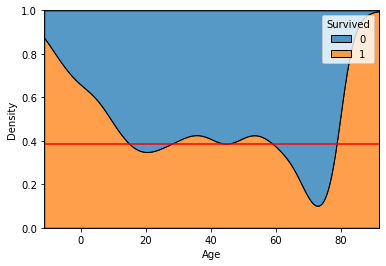

In [62]:
sns.kdeplot(x = feature, data = titanic, hue = target, multiple = 'fill')
plt.axhline(titanic[target].mean(), color = 'r')
plt.show()

2) 수치화 : 로지스틱회귀

In [64]:
titanic[feature].isna().sum()

177

In [65]:
temp = titanic.loc[titanic[feature].notnull()]

In [66]:
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.672504
         Iterations 4
Age    9.909841e-08
dtype: float64


3) 관계 평가하기

- p-value로 보아 나이와 생존 여부는 관계가 있다.

4) 추가 분석할 내용 정리

#### ② Fare --> Survived

In [41]:
feature = 'Fare'

1) 그래프 : histogram, densityplot

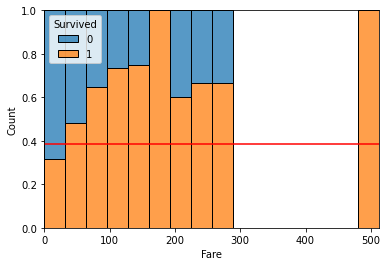

In [42]:
sns.histplot(x = feature, data = titanic, bins = 16
             , hue = target, multiple = 'fill')
plt.axhline(titanic[target].mean(), color = 'r')
plt.show()

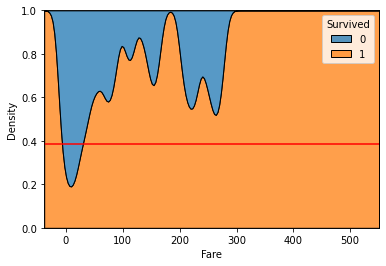

In [43]:
sns.kdeplot(x = feature, data = titanic, hue = target, multiple = 'fill')
plt.axhline(titanic[target].mean(), color = 'r')
plt.show()

2) 수치화 : 로지스틱회귀

In [44]:
model = sm.Logit(titanic[target], titanic[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.689550
         Iterations 4
Fare    0.014925
dtype: float64


3) 관계 평가하기

- p-value로 보아, Fare와 생존여부는 상관이 있다.

4) 추가 분석할 내용 정리

### (2) 범주형 X --> 범주형 Y

* 교차표(pd.crosstab())
* 시각화( Stacked Bar, Mosaic)
* 가설검정(카이제곱검정)
* 관계 평가

#### ① Sex --> Survived

In [45]:
feature = 'Sex'

1) 교차표(pd.crosstab())

In [46]:
pd.crosstab(titanic[target], titanic[feature])

Sex,female,male
Survived,,
0,81,468
1,233,109


2) 시각화( Stacked Bar, Mosaic)

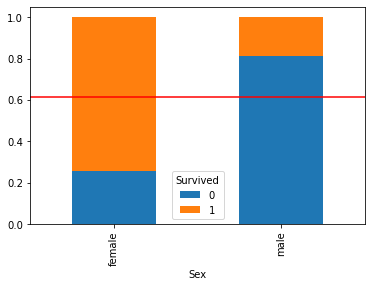

In [47]:
temp = pd.crosstab(titanic[feature], titanic[target], normalize = 'index')
temp.plot.bar(stacked=True)

plt.axhline(1-titanic[target].mean(), color = 'r')
plt.show()

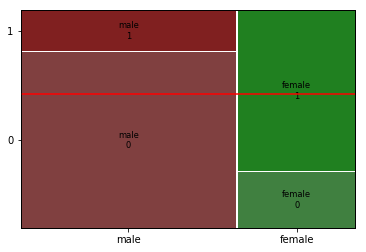

In [48]:
mosaic(titanic, [feature, target])
plt.axhline(1- titanic[target].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [49]:
# 먼저 집계
table = pd.crosstab(titanic[target], titanic[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Sex       female  male
Survived              
0             81   468
1            233   109
----------------------------------------------------------------------------------------------------
카이제곱통계량 260.71702016732104
p-value 1.1973570627755645e-58
기대빈도
 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


4) 관계 평가하기

- 여성이 남성보다 생존했을 확률이 높다.

5) 추가 분석하기

#### ② Pclass --> Survived

In [50]:
feature = 'Pclass'

1) 교차표(pd.crosstab())

In [51]:
pd.crosstab(titanic[target], titanic[feature])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


2) 시각화( Stacked Bar, Mosaic)

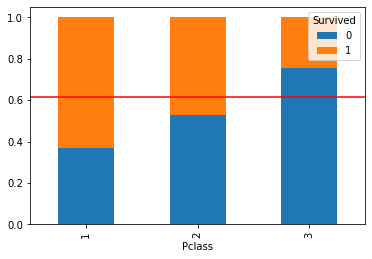

In [52]:
temp = pd.crosstab(titanic[feature], titanic[target], normalize = 'index')
temp.plot.bar(stacked=True)

plt.axhline(1-titanic[target].mean(), color = 'r')
plt.show()

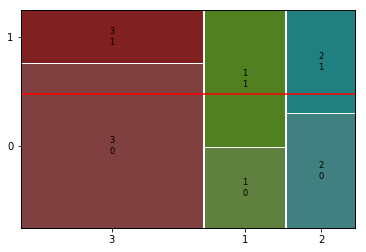

In [53]:
mosaic(titanic, [feature, target])
plt.axhline(1- titanic[target].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [54]:
# 먼저 집계
table = pd.crosstab(titanic[target], titanic[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
----------------------------------------------------------------------------------------------------
카이제곱통계량 102.88898875696056
p-value 4.549251711298793e-23
기대빈도
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


4) 관계 평가하기

- 객실 등급이 높을수록 생존했을 확률이 높다.

5) 추가 분석하기

#### ③ Embarked --> Survived

In [55]:
feature = 'Embarked'

1) 교차표(pd.crosstab())

In [56]:
pd.crosstab(titanic[target], titanic[feature])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


2) 시각화( Stacked Bar, Mosaic)

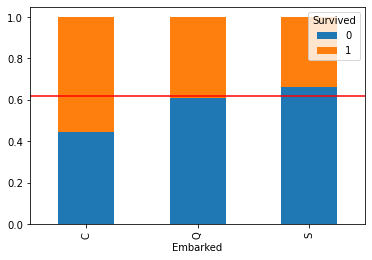

In [57]:
temp = pd.crosstab(titanic[feature], titanic[target], normalize = 'index')
temp.plot.bar(stacked=True)

plt.axhline(1-titanic[target].mean(), color = 'r')
plt.show()

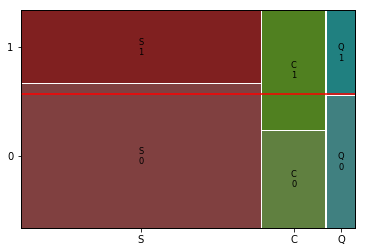

In [58]:
mosaic(titanic, [feature, target])
plt.axhline(1- titanic[target].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [59]:
# 먼저 집계
table = pd.crosstab(titanic[target], titanic[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217
----------------------------------------------------------------------------------------------------
카이제곱통계량 26.48914983923762
p-value 1.769922284120912e-06
기대빈도
 [[103.7480315  47.5511811 397.7007874]
 [ 64.2519685  29.4488189 246.2992126]]


4) 관계 평가하기

- C 지역에서 승선했으면 살아남을 확률이 높으나, 그 밖의 지역은 상관이 없다.

5) 추가 분석하기

### (3) 관계 정리하기

① 강한관계

- 숫자형
    - Age
    - Fare
- 범주형
    - Sex

② 중간관계

- 숫자형
- 범주형
    - Pclass

③ 관계없음

- 숫자형
- 범주형
    - Embarked